# Dynamic Programming

## Policy Evaluation vs. Control

**Policy evaluation** is the task of determining the value function for a specific policy. **Control** is the task of finding a policy to obtain as much reward as possible. In other words, finding a policy which maximizes the value function. Control is the ultimate goal of reinforcement learning. But the task of policy evaluation is usually a necessary first step. It's hard to improve our policy if we don't have a way to assess how good it is.

**Dynamic programming algorithms** use the Bellman equations to define iterative algorithms for both policy evaluation and control. Before diving into the details of this approach, imagine someone hands you a policy and your job is to determine how good that policy is. **Policy evaluation** is the task of determining the state value function $v_{\pi}$ for a particular policy $\pi$ ($\pi \rightarrow v_{\pi}$. Recall that the value of a state under a policy $\pi$ is the expected return from that state if we act according to $\pi$. The return ($G_t$) is itself a discounted sum of future rewards. 

$$
v_{\pi}(s) \doteq \mathbb{E}_{\pi} [\color{blue}{G_t} | S_t = s] \hspace{100px} \color{blue}{G_t = \sum\limits_{k=0}^{\infty} \gamma^k R_{t+k+1}}
$$

We have seen how the Bellman equation reduces the problem of finding $v_{\pi}$ to a system of linear equations, one equation for each state. 

$$
v_{\color{green}{\pi}}(s) = \sum\limits_a \color{green}{\pi}(a|s) \sum\limits_{s'}\sum\limits_{r} p(s',r | s, a) \left [ r + \gamma v_{\color{green}{\pi}}(s') \right ]
$$

So the problem of policy evaluation reduces to solving this system of linear equations. In principle, we could approach this task with a variety of methods from linear algebra.

<img src="images/linear_system_solver.svg" width="35%" align="center"/>

In practice, the iterative solution methods of dynamic programming are more suitable for general MDPs. 

<img src="images/dynamic_programming.svg" width="35%" align="center"/>

Control is the task of improving a policy. Recall that a policy $\pi_2$ is considered as good as or better than $\pi_1$ in the image (a) below if the value under $\pi_{2}$ is greater than or equal to the value under $\pi_1$ in every state. We say $\pi_2$ is strictly better than $pi_1$ if $\pi_2$ is as good as or better than $\pi_1$ and there's at least one state where the value under $\pi_2$ is strictly greater than the value under $\pi_1$. The goal of the control task is to modify a policy to produce a new one which is strictly better. Moreover, we can try to improve the policy repeatedly to obtain a sequence of better and better policies. When this is no longer possible, it means there is no policy which is strictly better than the current policy. And so the current policy must be equal to an optimal policy ($\pi_*$), and we can consider the control task complete. 

<img src="images/control.svg" width="70%" align="center"/>

Imagine we had access to the dynamics of the environment ($p$). We will learn how we can use this knowledge to solve the tasks of policy evaluation and control. Even with access to these dynamics, we will need careful thought and clever algorithms to compute value functions and optimal policies. We will investigate a class of solution methods called dynamic programming for this purpose. Dynamic programming uses the various Bellman equations we have seen, along with knowledge of $p$, to work out value functions and optimal policies. Classical dynamic programming does not involve interaction with the environment at all. Instead, we use dynamic programming methods to compute value functions and optimal policies given a model of the MDP. Nonetheless, dynamic programming is very useful for understanding other reinforced learning algorithms. Most reinforced learning algorithms can be seen as an approximation to dynamic programming without the model. This connection is perhaps most striking in the temporal different space dynamic planning algorithm.

## Iterative Policy Evaluation

**Dynamic programming algorithms** are obtained by turning the Bellman equations into update rules. Now, we will introduce the first of these algorithms called iterative policy evaluation. Remember the Bellman equation gives us a recursive expression for $v_\pi$. 

$$
v_{\color{green}{\pi}}(s) = \sum\limits_a \color{green}{\pi}(a|s) \sum\limits_{s'}\sum\limits_{r} p(s',r | s, a) \left [ r + \gamma v_{\color{green}{\pi}}(s') \right ]
$$

The idea of iterative policy evaluation is so simple that at first it might seem a bit silly. We take the Bellman equation and directly use it as an update rule. Now, instead of an equation which holds for the true value function, we have a procedure we can apply to iteratively refine our estimate of the value function. This will produce a sequence of better and better approximations to the value function. 

$$
v_{\color{red}{k+1}}(s) \leftarrow \sum\limits_a \pi(a|s) \sum\limits_{s'}\sum\limits_{r} p(s',r | s, a) \left [ r + \gamma v_{\color{red}{k}}(s') \right ]
$$

Let's see visually how this procedure works. We begin with an arbitrary initialization for our approximate value function, let's call this $v_0$. Each iteration then produces a better approximation by using the update rule shown above. Each iteration applies this updates to every state $s$ in the state space, which we call a *sweep*. Applying this update repeatedly leads to a better and better approximation to the state value function $v_pi$. 

<img src="images/vpi.gif" width="40%" align="center"/>

If this update leaves the value function approximation unchanged, that is, if $v_{k+1}$ equals $v_k$ for all states, then $v_k$ equals $v_\pi$, and we have found the value function. This is because $v_\pi$ is the unique solution to the Bellman equation. The only way the update could leave $v_k$ unchanged is if $v_k$ already obeys the Bellman equation. In fact, it can be proven that for any choice of $v_0$, $v_k$ will converge to $v_\pi$ in the limit as $k$ approaches infinity. 

$$
\lim\limits_{k\rightarrow\infty} v_k = v_\pi \ \ \ \ \ \text{for any} \  v_0
$$

To implement iterative policy evaluation, we store two arrays ($V$ and $V'$), each has one entry for every state. 

$$
\color{red}{V'}(s) = \sum\limits_a \pi(a|s) \sum\limits_{s'}\sum\limits_{r} p(s',r | s, a) \left [ r + \gamma \color{red}{V}(s') \right ]
$$

One array, which we label $V$ stores the current approximate value function. Another array, $V'$, stores the updated values. By using two arrays, we can compute the new values from the old one state at a time without the old values being changed in the process. At the end of a full sweep, we can write all the new values into $V$; then we do the next iteration. 

<img src="images/full_sweep.svg" width="90%" align="center"/>

It is also possible to implement a version with only one array, in which case, some updates will themselves use new values instead of old. This single array version is still guaranteed to converge, and in fact, will usually converge faster. This is because it gets to use the updated values sooner. 

<img src="images/single_array_version.svg" width="7%" align="center"/>

For simplicity, we focus on the two array version. Let's look at how iterative policy evaluation works on a particular example. Consider the four-by-four grid world shown below. This is an episodic MDP with the terminal state located in the top left and bottom right corners. The terminal state is shown in two places, but formally it is the same state. The reward will be minus one for every transition. Since the problem is episodic, let's consider the undiscounted case of $\gamma=1$. There are four possible actions in each state up, down, left, and right. Each action is deterministic. If the action would move the agent off the grid, it instead leaves the agent in the same state. 

<img src="images/grid_example.svg" width="30%" align="center"/>

Now, let's evaluate the uniform random policy, which selects each of the four actions one-quarter of the time. The value function represents the expected number of steps until termination from a given state. The order we sweep through the states is not important since we are using the two array version of the algorithm. Let's assume we sweep the states first from left to right, and then from top to bottom. We never update the value of the terminal state as it is defined to be zero. 

We initialize all the values in $V$ to zero. The initial value stored in $V'$ are irrelevant since they'll always be updated before they are used. We can now begin our first iteration with the update to state one (marked in red in the image below). 

<img src="images/grid_example_values.svg" width="40%" align="center"/>

To compute the update, we have to sum over all actions. Consider the left action first, which has probability one-quarter ($\pi(a|s)=0.25$) under the uniform random policy. The dynamics function $p$ is deterministic here so only the reward and value for one $s'$ contributes to the sum. The sum includes minus one for the reward ($r=-1$), and zero for the value of the terminal state ($V(s')=0$). Since we initialized all state values to zero, and the reward for each transition is minus one, the computation for all the other actions will look much the same. 

$$
V'(s) = 0.25*(-1+0) + 0.25*(-1+0) + 0.25*(-1+0) + 0.25*(-1+0) = -1
$$

The result is that $V'$ of state one is set to minus one. 

<img src="images/grid_example_values_1.svg" width="40%" align="center"/>

Next, we move to state two. 

<img src="images/grid_example_values_2.svg" width="40%" align="center"/>

We first evaluate the term in the sum for the left action. Again the action probability is one-quarter, and in this case, the next state is state one. Although we have updated the value of state one already, the version of the algorithm we are running we'll use the old value stored in $V$. So the value for state one in the update is still zero. 

$$
V'(s) = 0.25*(-1+0) + 0.25*(-1+0) + 0.25*(-1+0) + 0.25*(-1+0) = -1
$$

Again, all the other actions will look much the same. The result is that $V'$ of state two is also set to minus one. 

<img src="images/grid_example_values_3.svg" width="40%" align="center"/>

In fact, since every state value is initialized to zero, every state's value will be set to minus one. 

<img src="images/grid_example_values_4.svg" width="40%" align="center"/>

After completing this full sweep, we copy the updated values from $V'$ to $V$. 

<img src="images/grid_example_values_5.svg" width="40%" align="center"/>

This has been only one sweep. Let's discuss now the full algorithm for iterative policy evaluation. Take any policy we want to evaluate, initialize two arrays $V$ and $V'$. We can initialize these however we like, but let's set them to zero. We just saw how one sweep of iterative policy evaluation works. Let's look at how we compute multiple sweeps, and determine how the algorithm stops. The outer loop continues until the change in the approximate value function becomes small. We track the largest update to this state value in a given iteration. Let's call this delta ($\Delta$). The outer loop terminates when this maximum change is less than some user-specified constant called theta. As discussed before, once the approximate value function stops changing, we have converged to $v_\pi$. Similarly, once the change in the approximate value function is very small, this means we are close to $v_\pi$. 

---
$
\text{Algorithm: Iterative Policy Evaluation for estimating}\ V \approx v_\pi \\
\\
\text{Input}\ \pi\text{, the policy to be evaluated}\\
V \leftarrow \vec{0},\ V' \leftarrow \vec{0}\\
\text{Loop}\\
\ \ \ \Delta \leftarrow 0\\
\ \ \ \text{Loop for each}\ s \in \mathcal{S}:\\
\ \ \ \ \ \ V'(s) \leftarrow \sum\limits_a \pi(a|s) \sum\limits_{s',r} p(s',r|s,a)[r+\gamma V(s')]\\
\ \ \ \ \ \ \Delta \leftarrow \max(\Delta, |V'(s) - V(s)|)\\
\ \ \ V \leftarrow V'\\
\text{until}\ \Delta < \theta\ \ \ \text{(a small positive number)}\\
\text{Output}\ V \approx v_\pi
$

---

Let's pick up where we left off in our grid world example. We had just completed our first sweep. Let's use our value of $\theta=0.001$ for the stopping parameter theta. The smaller the value we choose, the more accurate our final value estimate will be. We've already completed one iteration, and the maximum change in value was $\Delta=1.0$. Since this is greater than $\theta=0.001$, we carry on to the next iteration. After the second sweep, notice how the terminal state starts to influence the value of the nearest states first. 

<img src="images/grid_example_values_6.svg" width="40%" align="center"/>

Let's run one more sweep. We see that now the influence of the terminal state has propagated further. 

<img src="images/grid_example_values_7.svg" width="40%" align="center"/>

Let's run a few more sweeps to see what happens. We can start to see how the value of each state is related to its proximity to the terminal state. Let's keep running until our maximum delta is less than theta. Here is the result we eventually arrive at, our approximate value function has converged to the value function for the random policy, and we're done. 

<img src="images/grid_example_values_8.svg" width="90%" align="center"/>

In [41]:
import numpy as np
def get_neighbors(mat, x, y):
    """ Return the neighboor values of the matrix.
    """
    #left
    xl, xr = (max(0, x-1), y), (min(x+1, mat.shape[0]-1), y)
    yu, yd = (x, max(0, y-1)), (x, min(y+1, mat.shape[1]-1))
    indexes = [xl, xr, yu, yd]
    values = []
    for i, j in sorted(indexes):
        values.append(mat[i][j])
    return values

def iteration(V, Vp, terminal_states, pi, reward):
    delta = 0
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            if (i, j) not in terminal_states:
                neighbors = get_neighbors(V, i, j)
                vp = 0
                for n in neighbors:
                    vp += pi * (reward + n)
                Vp[i][j] = vp
                current_delta = np.absolute(Vp[i][j] - V[i][j])
                delta = max(delta, current_delta)
    return Vp, delta

def run_algorithm(V, Vp, terminal_states, policy=0.25, reward=-1, theta=0.001):
    """ Perform iterative policy evaluation
    """
    delta = float('inf')
    nb_iteration = 0
    while delta > theta:
        nb_iteration += 1
        Vp, delta = iteration(V, Vp, terminal_states, policy, reward)
        V = Vp.copy()
        if nb_iteration % 10 == 0:
            print('Delta at iteration {}: {}'.format(nb_iteration, delta))
    return V, delta
        
V = np.zeros((4,4))
Vp = np.zeros((4,4))
terminal_states = [(0,0), (3,3)]
theta = 0.001
policy = 0.25
reward = -1

print('Initial value function:')
print(V)
finalV, delta = run_algorithm(V, Vp, terminal_states, policy, reward, theta)
print('Final delta: {}'.format(delta))
print('Final value function:')
print(np.round(finalV))

Initial value function:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Delta at iteration 10: 0.730255126953125
Delta at iteration 20: 0.4239568174816668
Delta at iteration 30: 0.2454359065894245
Delta at iteration 40: 0.14208195501679555
Delta at iteration 50: 0.08225065631786421
Delta at iteration 60: 0.047614563296345835
Delta at iteration 70: 0.027563872874601714
Delta at iteration 80: 0.015956611490231865
Delta at iteration 90: 0.009237216098327394
Delta at iteration 100: 0.005347386022364731
Delta at iteration 110: 0.003095579552088168
Delta at iteration 120: 0.0017920181417991898
Delta at iteration 130: 0.0010373918571673357
Final delta: 0.0009822066677322994
Final value function:
[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]


## Policy Improvement

We just looked at how dynamic programming can be used to iteratively evaluate a policy. We hinted that this was the first step towards the control task, which the goal is to improve a policy. Previously, we showed that given $v_*$, we can find the optimal policy by choosing the Greedy action. 

$$
\pi_{*}(s) = \mathop{\mathrm{argmax}}\limits_{a} \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[r + \gamma \color{red}{v_{*}}(s')]
$$

The Greedy action maximizes the Bellman's optimality equation in each state. Imagine instead of the optimal value function, we select an action which is greedy with respect to the value function $v_\pi$ of an arbitrary policy $\pi$. 

$$
\color{red}{?} = \mathop{\mathrm{argmax}}\limits_{a} \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[r + \gamma v_{\color{blue}{\pi}}(s')]
$$

What can we say about this new policy? That it is greedy with respect to $v_\pi$. The first thing to note is that this new policy must be different than $\pi$. If this greedification doesn't change $\pi$, then $\pi$ was already greedy with respect to its own value function.

$$
\color{blue}{\pi}(s) = \mathop{\mathrm{argmax}}\limits_{a} \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[r + \gamma v_{\color{blue}{\pi}}(s')]\ \ \ \text{for all}\ s \in \mathcal{S}
$$

This is just another way of saying that **$v_\pi$ obeys the Bellman's optimality equation**. In which case, $\pi$ is already optimal. In fact, the new policy obtained in this way must be a strict improvement on $\pi$, unless $\pi$ was already optimal. This is a consequence of a general result called the **policy improvement theorem**. 

### Policy improvement theorem

Recall the definition of $q_\pi$ that tells you the value of a state if you take action $a$, and then follow policy $\pi$. 

$$
q_{\color{blue}{\pi}}\left (s, \color{purple}{\pi'}(s) \right ) \ge q_{\color{blue}{\pi}}\left (s, \color{blue}{\pi}(s)\right )\ \ \ \text{for all}\ s \in \mathcal{S}
$$

Imagine we take action $a$ according to $\pi'$, and then follow policy $\pi$. If this action has higher value than the action under $\pi$, then $\pi'$ must be better. The policy improvement theorem formalizes this idea. Policy $\pi'$ is at least as good as $\pi$ if in each state, the value of the action selected by $\pi'$ is greater than or equal to the value of the action selected by $\pi$. 

$$
q_{\color{blue}{\pi}}\left (s, \color{purple}{\pi'}(s) \right ) \ge q_{\color{blue}{\pi}}\left (s, \color{blue}{\pi}(s)\right )\ \ \ \text{for all}\ s \in \mathcal{S}\ \ \ \rightarrow\ \ \ \color{purple}{\pi'} \ge \color{blue}{\pi}
$$

Policy $\pi'$ is strictly better if the value is strictly greater and at least one state. 

$$
q_{\color{blue}{\pi}}\left (s, \color{purple}{\pi'}(s) \right ) \ge q_{\color{blue}{\pi}}\left (s, \color{blue}{\pi}(s)\right )\ \ \ \text{for all}\ s \in \mathcal{S}\ \ \ \rightarrow\ \ \ \color{purple}{\pi'} > \color{blue}{\pi}
$$

Let's see how this works on the four-by-four grid rolled we use previously. The final value function we found is shown on the left in the image below. Remember that this is the value function for the uniform random policy. Using a greedy policy $\pi$, in each state, we need to select the action that leads to the next state with the highest value. In this case, the value that is least negative. The value of $\pi'$ is quite different from the uniform random policy we started with. Know that the value shown on the right in the image below do not correspond to the values for $\pi'$. 

<img src="images/policy_prime.svg" width="60%" align="center"/>

The new policy is guaranteed to be an improvement on the uniform random policy we started with according to the policy improvement theorem. In fact, if you look more closely at the new policy, we can see that it is in fact optimal. In every state, the chosen actions lie on the shortest path to the terminal state. Remember, the value function we started with was not the optimal value function, and yet the greedy policy with respect to $v_\pi$ is optimal. More generally, the policy improvement theorem only guarantees that the new policy is an improvement on the original. We cannot always expect to find the optimal policy so easily. It is important to note the policy improvement theorem tells us that greedified $\pi$ policy is a strict improvement, unless the original policy was already optimal.


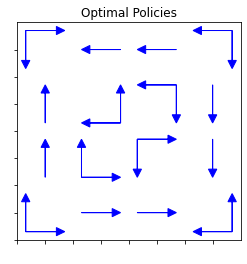

In [1]:
"""
This script uses the same classes from the Module 04. 
It was removed the first two lines from _v_star() since
they are designed for the specific problem of Module 04.
From utils.py, we add the size of the figure to the plot, 
so the output plot is adjusted to the current matrix.
"""

import numpy as np
from matplotlib import pyplot as plt

import utils


class Board(object):
    def __init__(self, values):
        self.values = values
        
    def __iter__(self):
        for i in range(len(self.values)):
            for j in range(len(self.values[i])):
                d = self._v_star(i, j)
                r = self._rewards(i, j)
                yield i, j, self.values[i][j], d, r
                
    def _v_star(self, x, y):
        #if x == 0 and (y == 1 or y == 3):
        #    return [16, 16, 16, 16] # l, u, r, d
        dpos = [float('-inf'), float('-inf'), float('-inf'), float('-inf')]
        if x > 0: dpos[1] = self.values[x-1][y]
        if x < len(self.values)-1: dpos[3] = self.values[x+1][y]
        if y > 0: dpos[0] = self.values[x][y-1]
        if y < len(self.values[x])-1: dpos[2] = self.values[x][y+1]
        return dpos
    
    def _rewards(self, x, y):
        if x == 0 and y == 1:
            return [10, 10, 10, 10]
        elif  x == 0 and y == 3:
            return [5, 5, 5, 5]
        drew = [-1, -1, -1, -1]
        if x > 0: drew[1] = 0
        if x < len(self.values)-1: drew[3] = 0
        if y > 0: drew[0] = 0
        if y < len(self.values[x])-1: drew[2] = 0
        return drew
        
           
class Policy(object):
    def __init__(self, board, gamma):
        self.board = board
        self.gamma = gamma
        self.pi = np.zeros(np.array(self.board.values).shape)
        
    def run(self):
        # r+gamma*v_sprime
        for arr in self.board:
            i, j, local_value, values, rewards = arr
            st_values =  np.array(rewards) + gamma * np.array(values)
            maxargs = np.argwhere(st_values == np.amax(st_values))
            self.pi[i][j] = utils.encode_to_arrow(maxargs.flatten())
        return self.pi            

# Load the resulting matrix V from Iterative Policy Evaluation
V = np.array([
    [ 0.        , -13.98945772, -19.98437823, -21.98251832],
    [-13.98945772, -17.98623815, -19.98448273, -19.98437823],
    [-19.98437823, -19.98448273, -17.98623815, -13.98945772],
    [-21.98251832, -19.98437823, -13.98945772,   0.        ]]
)

gamma = 0.9
board = Board(V)
pi = Policy(board, gamma)
arrows = pi.run()
utils.plot_arrows(arrows, figsize=V.shape)

# Policy Iteration

We just learned how the value function computed for a given policy can be used to find a better policy. Recall the policy improvement theorem. It tells us that we can construct a strictly better policy by acting greedily with respect to the value function of a given policy, unless the given policy was already optimal. 

$$
\color{blue}{\pi'}(s) = \mathop{\mathrm{argmax}}\limits_{a} \sum\limits_{s'}\sum\limits_{r} p(s', r| s, a)[r + \gamma v_{\color{blue}{\pi}}(s')]\ \ \ \text{for all}\ s \in \mathcal{S}
$$

Let's say we begin with the policy $\pi_1$. We can evaluate $\pi_1$ using iterative policy evaluation to obtain the state value, $v_{\pi_1}$. We call this the **evaluation** step. Using the results of the policy improvement theorem, we can then greedify with respect to $v_{\pi_1}$ to obtain a better policy, $\pi_2$. We call this the **improvement** step. We can then compute $v_{\pi_2}$ and use it to obtain an even better policy, $\pi_3$. 

$$
\pi_1\ \ \ \overset{E}{\rightarrow}\ \ \ v_{\pi_1}\ \ \ \overset{I}{\rightarrow}\ \ \ \pi_2\ \ \ \overset{E}{\rightarrow}\ \ \ v_{\pi_2}\ \ \ \overset{I}{\rightarrow}\ \ \ \pi_3\ \ \ \overset{E}{\rightarrow}\ \ \ \ldots
$$

This gives us a sequence of better policies. Each policy is guaranteed to be an improvement on the last unless the last policy was already optimal. So when we complete an iteration, and the policy remains unchanged, we know we have found the optimal policy. At that point, we can terminate the algorithm. 

$$
\pi_1\ \ \ \overset{E}{\rightarrow}\ \ \ v_{\pi_1}\ \ \ \overset{I}{\rightarrow}\ \ \ \pi_2\ \ \ \overset{E}{\rightarrow}\ \ \ v_{\pi_2}\ \ \ \overset{I}{\rightarrow}\ \ \ \pi_3\ \ \ \overset{E}{\rightarrow}\ \ \ \ldots\ \ \ \overset{I}{\rightarrow}\ \ \ \pi_*\ \ \ v_{\pi_*}\ \ \ \overset{I}{\rightarrow}\ \ \ \pi_*
$$

Each policy generated in this way is **deterministic**. There are finite number of deterministic policies, so this iterative improvement must eventually reach an optimal policy. This method of finding an optimal policy is called **policy iteration**. 

**Policy iteration** consists of two distinct steps repeated over and over, evaluation and improvement. We first evaluate our current policy, $\pi_1$, which gives us a new value function that accurately reflects the value of $\pi_1$. The improvement step then uses $v_{\pi_1}$ to produce a greedy policy $\pi_2$. At this point, $\pi_2$ is greedy with respect to the value function of $\pi_1$, but $v_{\pi_1}$ no longer accurately reflects the value of $\pi_2$. The next step evaluation makes our value function accurate with respect to the policy $\pi_2$. Once we do this, our policy is once again not greedy. 

<img src="images/policy_iteration.svg" width="30%" align="center"/>

This dance of policy and value proceeds back and forth, until we reach the only policy, which is greedy with respect to it's own value function, the optimal policy. At this point, and only at this point, the policy is greedy and the value function is accurate. We can visualize this dance as bouncing back and forth between one line, where the value function is accurate, and another where the policy is greedy. These two lines intersect only at the optimal policy and value function. 

<img src="images/policy_dance.svg" width="35%" align="center"/>

Policy iteration always makes progress towards the intersection by projecting first onto the line $v = v_\pi$, and then onto the line where $\pi$ is greedy with respect to $v$. Of course, the real geometry of the space of policies and value functions is more complicated, but the same intuition holds. 

Here's what this procedure looks like in pseudocode. We initialize $v$ and $\pi$ in any way we like for each state $s$. Next, we call iterative policy evaluation to make $V$ reflect the value of $\pi$. This is the algorithm we learned earlier in this module. Then, in each state, we set $\pi$ to select the maximizing action under the value function. If this procedure changes the selected action in any state, we note that the policy is still changing, and set policy stable to force. After completing step 3, we check if the policy is stable. If not, we carry on and evaluate the new policy. 

---
$
\text{Algorithm: Policy Iteration (using iterative policy evaluation) for estimating}\ \pi \approx \pi_* \\
$

**1. Initialization**

$
V(s) \in \mathbb{R}\ \text{and}\ \pi(s) \in \mathcal{A}(s)\ \text{arbitrarily for all}\ s \in \mathcal{S} \\
$

**2. Policy Evaluation**

$
\text{2. Policy Evaluation} \\
\text{Loop}\\
\ \ \ \Delta \leftarrow 0\\
\ \ \ \text{Loop for each}\ s \in \mathcal{S}:\\
\ \ \ \ \ \ v \leftarrow V(s)
\ \ \ \ \ \ V'(s) \leftarrow \sum\limits_{s',r} p(s',r|s,\pi(s))[r+\gamma V(s')]\\
\ \ \ \ \ \ \Delta \leftarrow \max(\Delta, |v - V(s)|)\\
\text{until}\ \Delta < \theta\ \ \ \text{(a small positive number determining the accuracy estimation)}\\
$

**3. Policy Improvement**

$
\text{policy-stable} \leftarrow True \\
\text{For each}\ s \in mathcal{S}: \\
\ \ \ \text{old-action} \leftarrow \pi(s) \\
\ \ \ \pi(s) \leftarrow \text{argmax}_a \sum\limits_{s',r} p(s',r|s,a) [r + \gamma V(s')] \\
\ \ \ \text{If old-action}\ \neq \pi(s),\ \text{then policy-stable}\ \leftarrow False \\
\text{If policy-stable, then stop and return}\ V \approx v_*\ \text{and}\ \pi \approx \pi_*;\ \text{else go to}\ 2
$

---

Let's look at how this works on a simple problem to build some intuition. Remember the four-by-four grid ruled example we used to demonstrate iterative policy evaluation. Previously, we showed that by evaluating the random policy, and greedifying just once, we could find the optimal policy. This is not a very interesting case for policy iteration. Let's modify this problem a little bit to make the control task a bit harder. First, let's remove one of the terminal states so that there's only one way to end the episode (represented as the gray cell on the top-left corner in image below). Previously, each state admitted a reward of `-1`. Instead, let's add some especially bad states. These bad states are marked as blue cells in the image below. Transitioning into them gives a reward of `-10`. The optimal policy should follow the winding low cost path in white to the terminal state. This additional complexity means that policy iteration takes several iterations to discover the path. 

<img src="images/example_iterative_policy.svg" width="40%" align="center"/>

Let's see how this plays out in the image below. First, we initialize a policy and value function. As before, we choose the uniform random policy, and set the value estimate to zero for all states. The first step is to use iterative policy evaluation to evaluate the uniform random policy. Since you've seen how this works before, let's skip straight to the result. The values are quite negative everywhere, those slightly less so in states near the goal. Next we perform the improvement step. You've seen how greedification works before. So again, let's skip to the result. Notice that near the terminal state, the policy correctly follows the low cost path toward the terminal state. In the states in the bottom row however, the policy instead takes them more direct, but lower value path through the bad states. 

<img src="images/example_evaluation_improvement.svg" width="70%" align="center"/>

Let's evaluate this new policy. Notice how after just one improvement, the values are starting to look much more reasonable, but we aren't finished yet. 

<img src="images/evaluation_improvement_1.svg" width="40%" align="center"/>

Let's greedify again. Remember, the policy improvement theorem tells us that this new policy is an improvement on the last one, unless we have already reached the optimum. Specifically, the bottom-right state now goes straight up along the low cost path. 

<img src="images/evaluation_improvement_2.svg" width="40%" align="center"/>

One more step of policy evaluation reflects this change. The value of the bottom right state goes from `-15` to just `-6`. 

<img src="images/evaluation_improvement_3.svg" width="40%" align="center"/>

Let's keep going until we reach the optimal policy. One more step of improvement improves the action selection and yet another state. 

<img src="images/evaluation_improvement_4.svg" width="40%" align="center"/>

The next step of policy evaluation reflects this change. 

<img src="images/evaluation_improvement_5.svg" width="40%" align="center"/>

Improve again, and evaluate, and improve. 

<img src="images/evaluation_improvement_6.svg" width="40%" align="center"/>
<img src="images/evaluation_improvement_7.svg" width="40%" align="center"/>
<img src="images/evaluation_improvement_8.svg" width="40%" align="center"/>

Now, we can see that the policy has reached the optimum, and follows a low cost path avoiding the blue states. Evaluating one more time gives us the optimal value function. 

<img src="images/evaluation_improvement_9.svg" width="40%" align="center"/>

If we try to greedify again, the policy remains unchanged. This tells us that policy iteration is complete, and the optimal policy has been found. This example shows the power of policy iteration, in that it guarantees we can follow a sequence of increasingly better policies until we reach an optimal policy. Policy iteration cuts through the search space, which is key when the optimal policy is not straightforward, in this case literally. The same complexity will come up and problems we really care about.

## Flexibility of the Policy Iteration Framework

So far, we've presented policy iteration as a fairly rigid procedure. We alternate between evaluating the current policy and greedify to improve the policy. The framework of generalized policy iteration allows much more freedom than this while maintaining our optimality guarantees. Recall the dance of policy and value, as shown in (a) in the image below. The policy iteration algorithm runs each step all the way to completion. Intuitively, we can imagine relaxing this. Imagine instead, we follow a trajectory like the one shown in (b) in the image below. 

<img src="images/policy_dance_real.svg" width="60%" align="center"/>

Each evaluation step brings our estimate a little closer to the value of the current policy but not all the way. Each policy improvement step makes our policy a little more greedy, but not totally greedy. Intuitively, this process should still make progress towards the optimal policy and value function. In fact, the theory tells us the same thing. 

We will use the term **Generalized Policy Iteration** to refer to all the ways we can interleave policy evaluation and policy improvement. This brings us to our first generalized policy iteration algorithm, called **Value Iteration**. In value iteration, we still sweep over all the states and greedify with respect to the current value function. However, we do not run policy evaluation to completion. We perform just one sweep over all the states. After that, we greedify again. We can write this as an update rule which applies directly to the state value function. 

---
**Algorithm parameter**: a small threshold $\theta > 0$ determining accuracy of estimation.<br>
Initialize $V(s)$, for all $s \in \mathcal{S}^+$, arbitrarily except that $V($terminal$) = 0$.

$
\text{Loop:} \\
\ \ \ \Delta \leftarrow 0 \\
\ \ \ \text{Loop for each}\ s \in \mathcal{S}: \\
\ \ \ \ \ \ v \leftarrow V(s) \\
\ \ \ \ \ \ V(s) \leftarrow \max\limits_a \sum\limits_{s',r} p(s',r|s, a) [r + \gamma V(s')] \\
\ \ \ \ \ \ \Delta \leftarrow \max (\Delta, |v - V(s)|) \\
\text{until}\ \Delta < \theta
$

Output a deterministic policy $\pi \approx \pi_*$, such that

$
\pi(s) = \text{argmax}_a \sum\limits_{s',r} p(s',r|s,a)[r + \gamma V(s')]
$

---

The update does not reference any specific policy, hence the name value iteration. The full algorithm looks very similar to iterative policy evaluation. Instead of updating the value according to a fixed falsey, we update using the action that maximizes the current value estimate. Value iteration still converges to $v_*$ in the limit. We can recover the optimal policy from the optimal value function by taking the argmax. In practice, we need to specify a termination condition because we can't wait forever. We will use the same condition we use for policy evaluation. We simply terminate when the maximum change in the value function over a full sweep is less than some small value $\theta$. 

Value iteration sweeps the entire state space on each iteration just like policy iteration. Methods that perform systematic sweeps like the one show on the left in the image below are called synchronous. This can be problematic if the statespace is large. Every sweep could take a very long time. Asynchronous dynamic programming algorithms update the values of states in any order as shown on the right in the image below. They do not perform systematic sweeps, they might update a given state many times before another is updated even once. 

<img src="images/asynchronous.gif" width="40%" align="center"/>

In order to guarantee convergence, asynchronous algorithms must continue to update the values of all states. For example, the algorithm cannot update the same three states forever ignoring all the others. This is not acceptable because the other states cannot be correct if they are never updated at all. Asynchronous algorithms can propagate value information quickly through selective updates. Sometimes this can be more efficient than a systematic sweep. For example, an asynchronous method can update the states near those that have recently changed value.

## Efficiency of Dynamic Programming

**Iterative Policy Evaluation** is the dynamic programming solution to the prediction or policy evaluation problem. Let's look at a sample-based alternative for policy evaluation. The value of each state can be treated as a totally independent estimation problem. First, recall that the value is the expected return from a given state.

$$
V_{\pi}(s) \doteq \mathbb{E}_{\pi} [\color{blue}{G_t} | S_t = s] \hspace{100px} \color{blue}{G_t = \sum\limits_{k=0}^{\infty} \gamma^k R_{t+k+1}}
$$

The procedure is simple, first, we gather a large number of returns under $\pi$ and take their average. This will eventually converge to the state value, this is called the **Monte Carlo method**.

<img src="images/monte_carlo.svg" width="50%" align="center"/>

However, if we do it this way, we may need a large number of returns from each state. Each return depends on many random actions, selected by $\pi$, as well as many random state transitions due to the dynamics of the MDP. 

<img src="images/value_function.svg" width="50%" align="center"/>

We could be dealing with a lot of randomness here, each return might be very different than the true state value. So we may need to average many returns before the estimate converges, and we have to do this for every single state. 

The key insight of dynamic programming is that we do not have to treat the evaluation of each state as a separate problem. We can use the other value estimates we have already worked so hard to compute.

$$
v_{k+1}(\color{red}{s}) \leftarrow \sum\limits_a \pi(a|s) \sum\limits_{s'}\sum\limits_{r} p(s',r | s, a) \left [ r + \gamma v_{k}(\color{blue}{s'}) \right ]
$$

This process of using the value estimates of successor states to improve our current value estimate is known as **bootstrapping**. 

<img src="images/bootstrapping.svg" width="25%" align="center"/>

This can be much more efficient than a Monte Carlo method that estimates each value independently.

**Policy Iteration** computes optimal policies, **brute-force search** is a possible alternative. This method simply evaluates every possible deterministic policy one at a time, we then pick the one with the highest value. There are a finite number of deterministic policies, and there always exists an optimal deterministic policy. So brute-force search will find the answer eventually, however, the number of deterministic policies can be huge. A deterministic policy consists of one action choice per state. So the total number of deterministic policies is exponential in the number of states ($|\mathcal{A}|^{|\mathcal{S}|}$). Even on a fairly simple problem, this number could be massive, this process could take a very long time. The **Policy Improvement Theorem** guarantees that policy iteration will find a sequence of better and better policies. This is a significant improvement over exhaustively trying each and every policy.

So how efficient is dynamic programming compared to these naive alternatives? Well, policy iteration is guaranteed to find the optimal policy in time polynomial in the number of states ($|\mathcal{S}|$) and actions ($|\mathcal{A}|$). Thus, dynamic programming is exponentially faster than the brute-force search of the policy space.

In practice, dynamic programming is usually much faster, even in this worst-case guarantee. For example, the original four-by-four GridWorld converged in just one step of policy iteration. When we made the problem harder by adding bad states, it still converged in just five iterations. It might also seem restrictive that we have to run policy evaluation to completion for each step of policy iteration (Brute-Force search takes $4^{16}$ policies). In practice, this is not so bad, with each iteration, the policy tends to change less and less.

The policy evaluation step changes the value function less and thus the evaluation step typically terminates quickly. Generally, solving an MDP gets harder as the number of states grows. The **curse of dimensionality** says that the size of the state space grows exponentially as the number of state variable increases. A single agent moving around a GridWorld is fine. But what if we wanted to coordinate a transportation network of thousands of drivers moving between hundreds of locations? A raw enumeration of the possible states could lead to an exponential blow-up. Clearly, this would lead to problems if we try to sweep the states to perform policy iteration. In fact, this is not an issue with dynamic programming. This is a statement about the difficulty of the problems we are interested in tackling, various techniques for mitigating this curse exist.

## Warren Powell: Approximate Dynamic Programming for Fleet Management



<font color='#cc0000'>**error**</font>
<font color='#2A52BE'>**step size**</font> 
<img src="images/reward_weight.svg" width="40%" align="center"/>
<font color='#cc0000'>&#9660;</font>
<font color='#00ff00'>&#9650;</font>
&#9744; 
<div class="alert alert-block alert-info"><b>Note:</b> Use this equation in questions (2) to (5)</div>
<div class="alert alert-block alert-success"><b>Success:</b> Green box.</div>
<div class="alert alert-block alert-danger"><b>Danger:</b> Red box.</div>
<code style="background:yellow;color:black">Highlighting.</code>

In [2]:
# Centralize images
from IPython.core.display import HTML
def css_styling():
    styles = open("../_styles/custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()